In [74]:
import re
import glob
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [49]:
# Read in cliches into a list
with open("cliche_edited.txt") as cliche_file:
    cliches_list = [line.rstrip() for line in cliche_file]

First we tried to see if we could get any results on one author to check if the cliches existed in the data

In [50]:
# Try running on one author
txt_files = glob.glob("novels_clean/Lewis Carroll/*.txt")

cliche_count = 0

# Read each file
for file in txt_files:
    f = open(file, "r")
    
    # Loop through each line in the text
    for line in f:
        # Check for each cliche
        for cliche in cliches_list:
            if cliche in line:
                cliche_count += 1
    
    f.close()

print("Number of cliches: ")
print(cliche_count)

Number of cliches: 
627


Once that was successful, we tried the same approach on all authors

In [51]:
# Try running on all authors
# Collect list of all author names
folders = glob.glob("novels_clean/*")

# For each author, check # of cliches
for author in folders:
    path = author + "/*.txt"
    txt_files = glob.glob(path)

    cliche_count = 0

    # Read each file
    for file in txt_files:
        f = open(file, "r")

        # Loop through each line in the text
        for line in f:
            # Check for each cliche
            for cliche in cliches_list:
                if cliche in line:
                    cliche_count += 1

        f.close()

    # Print number of cliches found in each authors total files
    print("Number of cliches for " + author + ": ")
    print(cliche_count)

Number of cliches for novels_clean/H.B. Marriott Watson: 
273
Number of cliches for novels_clean/William Harrison Ainsworth: 
2013
Number of cliches for novels_clean/Clemence Housman: 
134
Number of cliches for novels_clean/James Payn: 
762
Number of cliches for novels_clean/Georgiana Fullerton: 
260
Number of cliches for novels_clean/Emma Leslie: 
250
Number of cliches for novels_clean/Frederick Marryat: 
5476
Number of cliches for novels_clean/Leonard Merrick: 
593
Number of cliches for novels_clean/Emily Bronte: 
118
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/milkcap/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/_3/fcgjmwrx07d11ylq6tn308fr0000gn/T/ipykernel_15071/1126751696.py", line -1, in <module>
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/milkcap/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 2102, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/milkcap/Library/Python/3.11/lib/python/site-packages/IPython/core/ultratb.py", line 1310, in structured_traceback
    return FormattedTB.structured_traceback(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/milkcap/Library/Python/3.11/lib/python/site-packages/IPython/core/ultratb.py", line 1

This gave results, but looking back at our list of expressions, it seems there may be some false positives.  As such, we're going to exclude one-word expressions and add in word boundaries.  Additionaly, we were counting the number of cliches present in the file—we've updated the code to count duplicate occurances of specific cliches.

In [ ]:
# Remove single word cliches
new_cliches_list = []
for cliche in cliches_list:
    if " " in cliche.strip():
        new_cliches_list.append(cliche)

In [ ]:
# Try new approach running on one author
txt_files = glob.glob("novels_clean/Jane Austen/*.txt")

cliche_count = 0

# Read each file
for file in txt_files:
    f = open(file, "r")
    
    # Loop through each line in the text
    for line in f:
        
        # Check for each cliche
        for cliche in new_cliches_list:
            cliche_count += line.count(cliche)
    
    f.close()

print("Number of cliches: ")
print(cliche_count)

Number of cliches: 
8646


Playing with the results, these seem much more meaningful.  Let's try this for all the authors.

In [ ]:
# Dictionary to hold author: cliche count
author_results = {}

In [ ]:
# Try running on all authors
# Collect list of all author names
folders = glob.glob("novels_clean/*")

# For each author, check # of cliches
for author in folders:
    path = author + "/*.txt"
    txt_files = glob.glob(path)

    cliche_count = 0

    # Read each file
    for file in txt_files:
        f = open(file, "r")

        # Loop through each line in the text
        for line in f:
            # Check for each cliche
            for cliche in new_cliches_list:
                cliche_count += line.count(cliche)

        f.close()

    # Print number of cliches found in each authors total files
    author = author[13:]
    print("Number of cliches for " + author + ": ")
    print(cliche_count)
    
    # Add to dictionary
    author_results[author] = cliche_count

Number of cliches for H.B. Marriott Watson: 
991
Number of cliches for William Harrison Ainsworth: 
9763
Number of cliches for Clemence Housman: 
322
Number of cliches for James Payn: 
2369
Number of cliches for Georgiana Fullerton: 
1860
Number of cliches for Emma Leslie: 
758
Number of cliches for Frederick Marryat: 
26371
Number of cliches for Leonard Merrick: 
2110
Number of cliches for Emily Bronte: 
548
Number of cliches for William Makepeace Thackeray: 
14037
Number of cliches for Florence Marryat: 
1044
Number of cliches for Israel Zangwill: 
7227
Number of cliches for Hall Caine: 
13542
Number of cliches for Morley Roberts: 
2264
Number of cliches for Ann Radcliffe: 
1846
Number of cliches for H.G. Wells: 
20170
Number of cliches for E. Phillips Oppenheim: 
11341
Number of cliches for R.D. Blackmore: 
18888
Number of cliches for Thomas Hughes: 
4889
Number of cliches for Thomas Love Peacock: 
935
Number of cliches for Edgar Jepson: 
950
Number of cliches for Ouida: 
9448
Numbe

In [ ]:
print(author_results)

{'H.B. Marriott Watson': 991, 'William Harrison Ainsworth': 9763, 'Clemence Housman': 322, 'James Payn': 2369, 'Georgiana Fullerton': 1860, 'Emma Leslie': 758, 'Frederick Marryat': 26371, 'Leonard Merrick': 2110, 'Emily Bronte': 548, 'William Makepeace Thackeray': 14037, 'Florence Marryat': 1044, 'Israel Zangwill': 7227, 'Hall Caine': 13542, 'Morley Roberts': 2264, 'Ann Radcliffe': 1846, 'H.G. Wells': 20170, 'E. Phillips Oppenheim': 11341, 'R.D. Blackmore': 18888, 'Thomas Hughes': 4889, 'Thomas Love Peacock': 935, 'Edgar Jepson': 950, 'Ouida': 9448, 'Maurice Hewlett': 6204, 'Thomas Hardy': 12908, 'Walter Besant': 9368, 'G.A. Henty': 61749, 'Bernard Capes': 7192, 'Charles Dickens': 37035, 'Frederick Rolfe': 610, 'Hugh Conway': 403, 'Maria Edgeworth': 11079, 'Elizabeth Gaskell': 13872, 'William Godwin': 2159, 'Walter Pater': 1152, 'Grace Aguilar': 3679, 'Charles Kingsley': 6568, 'Charlotte Bronte': 3395, 'George Grossmith': 279, 'Anthony Trollope': 56956, 'Flora Annie Steel': 10062, 'Ame

In [52]:
df = pd.read_csv("english_novelists.csv")
df.head(10)

,gutenberg_name,goodreads_name,num_mla_entries,alt_name,average_rating,author_id,text_reviews_count,ratings_count,gutenberg_texts
0,"Aguilar, Grace, 1816-1847",Grace Aguilar,27,NaN,3.27,127826,50,370,"[{'gutenberg_id': '12361', 'title': ""The Mothe..."
1,"Ainsworth, William Harrison, 1805-1882",William Harrison Ainsworth,50,NaN,3.41,141739,123,718,"[{'gutenberg_id': '2866', 'title': 'Windsor Ca..."
2,"Arnold, Edwin Lester, 1857-1935",Edwin Lester Arnold,5,NaN,3.11,5865720,47,218,"[{'gutenberg_id': '604', 'title': 'Gulliver of..."
3,"Austen, Jane, 1775-1817",Jane Austen,5593,NaN,4.10,1265,127817,4693826,"[{'gutenberg_id': '105', 'title': 'Persuasion'..."
4,"Benson, E. F. (Edward Frederic), 1867-1940",E.F. Benson,21,"Benson, Edward Frederic",4.04,13479797,2155,24458,"[{'gutenberg_id': '2072', 'title': 'Michael', ..."
5,"Besant, Walter, 1836-1901",Walter Besant,63,NaN,3.56,311761,88,1199,"[{'gutenberg_id': '16129', 'title': 'In Luck a..."
6,"Blackmore, R. D. (Richard Doddridge), 1825-1900",R.D. Blackmore,70,"Blackmore, Richard",3.72,545254,544,13422,"[{'gutenberg_id': '840', 'title': 'Lorna Doone..."
7,"Brontë, Anne, 1820-1849",Anne Bronte,446,NaN,3.84,8249,5299,114648,"[{'gutenberg_id': '767', 'title': 'Agnes Grey'..."
8,"Brontë, Charlotte, 1816-1855",Charlotte Bronte,2593,NaN,4.08,1036615,37697,1420215,"[{'gutenberg_id': '1028', 'title': 'The Profes..."
9,"Brontë, Emily, 1818-1848",Emily Bronte,1440,NaN,3.83,4191,27743,1046247,"[{'gutenberg_id': '768', 'title': 'Wuthering H..."


In [53]:
# declare new dictionar

author_text = {}

# Try running on all authors
# Collect list of all author names
folders = glob.glob("novels_clean/*")

# For each author, check # of cliches
for author in folders:
    path = author + "/*.txt"
    txt_files = glob.glob(path)

    text_count = 0

    # Read each file
    for file in txt_files:
        f = open(file, "r")

        # Loop through each line in the text
        for line in f:
            # Check for each cliche
            lines = line.split()
            text_count += len(lines)

        f.close()

    # Print number of text in each authors total files
    author = author[13:]
    print("Number of text for " + author + ": ")
    print(text_count)


    # Add to dictionary
    author_text[author] = text_count

Number of text for H.B. Marriott Watson: 
112756
Number of text for William Harrison Ainsworth: 
1670371
Number of text for Clemence Housman: 
58275
Number of text for James Payn: 
337324
Number of text for Georgiana Fullerton: 
236213
Number of text for Emma Leslie: 
89204
Number of text for Frederick Marryat: 
3707018
Number of text for Leonard Merrick: 
263722
Number of text for Emily Bronte: 
83064
Number of text for William Makepeace Thackeray: 
2139337
Number of text for Florence Marryat: 
123419
Number of text for Israel Zangwill: 
1048521
Number of text for Hall Caine: 
1578008
Number of text for Morley Roberts: 
270160
Number of text for Ann Radcliffe: 
360034
Number of text for H.G. Wells: 
2697844
Number of text for E. Phillips Oppenheim: 
1564557
Number of text for R.D. Blackmore: 
2115919
Number of text for Thomas Hughes: 
572786
Number of text for Thomas Love Peacock: 
152140
Number of text for Edgar Jepson: 
130692
Number of text for Ouida: 
1395846
Number of text for Ma

In [54]:
df_text = pd.DataFrame(author_text.items(), columns=['Author', 'Total_word'])
df_cliche = pd.DataFrame(author_results.items(), columns = ['Author', 'Cliche'])

df_merged = pd.merge(df_text, df_cliche)

df = pd.merge(df, df_merged, how="left", left_on="goodreads_name", right_on="Author")

,gutenberg_name,goodreads_name,num_mla_entries,alt_name,average_rating,author_id,text_reviews_count,ratings_count,gutenberg_texts,Author,Total_word,Cliche
0,"Aguilar, Grace, 1816-1847",Grace Aguilar,27,NaN,3.27,127826,50,370,"[{'gutenberg_id': '12361', 'title': ""The Mothe...",Grace Aguilar,594951,3679
1,"Ainsworth, William Harrison, 1805-1882",William Harrison Ainsworth,50,NaN,3.41,141739,123,718,"[{'gutenberg_id': '2866', 'title': 'Windsor Ca...",William Harrison Ainsworth,1670371,9763
2,"Arnold, Edwin Lester, 1857-1935",Edwin Lester Arnold,5,NaN,3.11,5865720,47,218,"[{'gutenberg_id': '604', 'title': 'Gulliver of...",Edwin Lester Arnold,161390,1112
3,"Austen, Jane, 1775-1817",Jane Austen,5593,NaN,4.10,1265,127817,4693826,"[{'gutenberg_id': '105', 'title': 'Persuasion'...",Jane Austen,1452922,8646
4,"Benson, E. F. (Edward Frederic), 1867-1940",E.F. Benson,21,"Benson, Edward Frederic",4.04,13479797,2155,24458,"[{'gutenberg_id': '2072', 'title': 'Michael', ...",E.F. Benson,2641338,21578
5,"Besant, Walter, 1836-1901",Walter Besant,63,NaN,3.56,311761,88,1199,"[{'gutenberg_id': '16129', 'title': 'In Luck a...",Walter Besant,1192682,9368
6,"Blackmore, R. D. (Richard Doddridge), 1825-1900",R.D. Blackmore,70,"Blackmore, Richard",3.72,545254,544,13422,"[{'gutenberg_id': '840', 'title': 'Lorna Doone...",R.D. Blackmore,2115919,18888
7,"Brontë, Anne, 1820-1849",Anne Bronte,446,NaN,3.84,8249,5299,114648,"[{'gutenberg_id': '767', 'title': 'Agnes Grey'...",Anne Bronte,168607,1428
8,"Brontë, Charlotte, 1816-1855",Charlotte Bronte,2593,NaN,4.08,1036615,37697,1420215,"[{'gutenberg_id': '1028', 'title': 'The Profes...",Charlotte Bronte,509940,3395
9,"Brontë, Emily, 1818-1848",Emily Bronte,1440,NaN,3.83,4191,27743,1046247,"[{'gutenberg_id': '768', 'title': 'Wuthering H...",Emily Bronte,83064,548


In [87]:
df["cliche_ratio"] = df["Cliche"] / df["Total_word"]
df["rating_and_review_count"] = df["ratings_count"] + df["text_reviews_count"]


author_data = df[['Author','cliche_ratio', "average_rating", "num_mla_entries", "rating_and_review_count"]]
data = df[['cliche_ratio', "average_rating", "num_mla_entries", "rating_and_review_count"]]
data

,cliche_ratio,average_rating,num_mla_entries,rating_and_review_count
0,0.006184,3.27,27,420
1,0.005845,3.41,50,841
2,0.006890,3.11,5,265
3,0.005951,4.10,5593,4821643
4,0.008169,4.04,21,26613
...,...,...,...,...
72,0.008176,3.94,1253,89063
73,0.007476,3.81,1615,812157
74,0.009307,3.61,4,87
75,0.006402,4.09,14,216


array([[<Axes: title={'center': 'cliche_ratio'}>,
        <Axes: title={'center': 'average_rating'}>],
       [<Axes: title={'center': 'num_mla_entries'}>,
        <Axes: title={'center': 'rating_and_review_count'}>]],
      dtype=object)

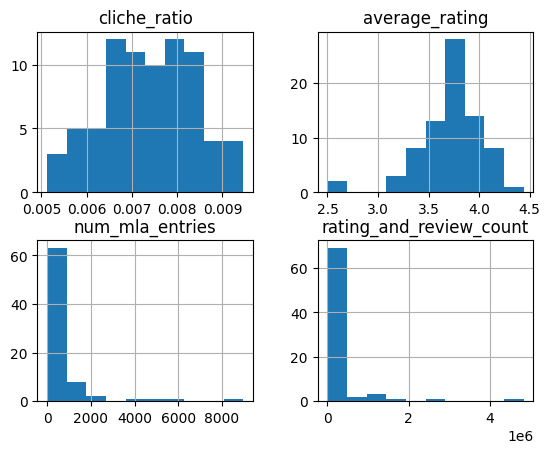

In [89]:
pd.DataFrame.hist(data)

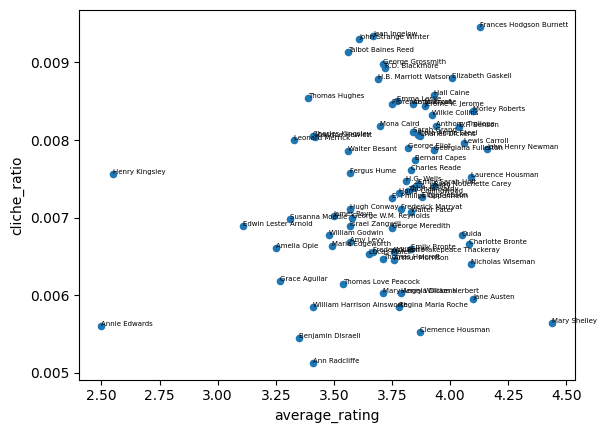

In [83]:
ax = author_data.plot(kind = "scatter",
                 x = "average_rating",
                 y = "cliche_ratio")

for idx, row in author_data.iterrows():
    ax.annotate(row['Author'], (row['average_rating'], row['cliche_ratio']),
                fontsize=5)